![logos.jpeg](logos.jpeg)

<div style="text-align: center;">

# Distâncias Genéticas e Filogenia
Gabriel Viégas Ribeiro & Pedro Coelho Gimenes de Freitas
<br>
Vinicius Francisco Wasques

</div>

**Contexto:** Construir árvores filogenéticas usando diferentes métricas de distância entre sequências de DNA.

**Objetivos:** Comparar árvores usando as métricas de Hamming, Euclidiana e Levenshtein e avaliar impacto da métrica na interpretação evolutiva.

-------

# Introdução

Na bioinformática, a construção de árvores filogenéticas é crucial para compreender relações de evolução e filogenia entre espécies. Com os avanços em genética e genômica, surge o *DNA barcoding*, a mínima parte necessária para a identificação molecular da taxonomia de determinada espécie. Há diversos tipo de *barcoding*, que variam de acordo com o nível taxonômico desejado.

As técnicas de filogenia a partir de trechos genômicos se baseia, portanto, no alinhamento de sequências e na distância entre elas. Para verificar a distância, é possível basear-se em diversas métricas; nesse trabalho, exploraremos três: a métrica de Hamming, a métrica de Levenshtein e a métrica Euclidiana. 

### Métrica de Hamming

A distância de Hamming mede o número de posições em que duas sequências de caracteres de mesmo comprimento possuem símbolos diferentes.

$$
ham(x,y) = \sum_{i=1}^n 1 (x_i \ne y_i)
$$

Essa métrica, portanto, verifica apenas substituições entre duas sequências de mesmo tamanho. 

[Fonte](https://www.datacamp.com/tutorial/hamming-distance)

### Métrica de Levenshtein

A distância de Levenshtein mede a quantidade mínima de mudanças nos caracteres necessária para levar uma sequência à outra. Essas mudanças contabilizam eventos de inserção, substituição e deleção. A distância é dada pelo seguinte:

$$
lev(x, y) = 
\begin{cases}
|x|, \text{se } |y| = 0 \\
|y|, \text{se } |x| = 0 \\
lev(tail(x), tail(y)), \text{se head(x) = head(y)} \\
1 + min \begin{cases} lev(tail(x), y) \\ lev(x, tail(y)) \\ lev(tail(x), tail(y)) \end{cases}, \text{ de outra forma}
\end{cases}
$$


### Métrica Euclidiana

A mais comum das métricas, sua distância é dada por:

$$
d(x, y) = \sqrt{(p_1 - q_1)^2 + ... + (p_n - q_n)^2}
$$

### Alinhamento e Mapeamento Voss
Regiões de *barcoding* não tem necessariamente o mesmo tamanho, uma vez que há, no DNA, eventos de exclusão e inserção. Dessa maneira, para utilizarmos a métrica Hamming, as sequências analisadas precisarão ser alinhadas. Como isso foge do escopo do nosso trabalho, utilizaremos externamente o MAFFT, programa de alinhamento múltiplo de sequências que nos retorna sequências alinhadas, com espaços em regiões de inserção/deleção. 

Além disso, apesar da primeira e segunda trabalharem com *strings*, a última trabalha com números, de maneira que é necessário realizar um mapeamento da sequência de DNA para uma sequência de números reais. Escolhemos o mapeamento Voss, que, em [INSERIR FONTE] é analisada como uma boa opção para manter a informação da sequência em números reais. Esse mapeamento define quatro vetores do tamanho da sequência original que obedecem à seguinte equação:

$$
voss(seq) = 
\begin{cases}
V_A(s) = \begin{cases} 1, \text{se } seq(s) = A \\ 0, \text{ de outra forma} \end{cases} \\
V_T(s) = \begin{cases} 1, \text{se } seq(s) = T \\ 0, \text{ de outra forma} \end{cases} \\
V_G(s) = \begin{cases} 1, \text{se } seq(s) = G \\ 0, \text{ de outra forma} \end{cases} \\
V_C(s) = \begin{cases} 1, \text{se } seq(s) = C \\ 0, \text{ de outra forma} \end{cases} \\
\end{cases}
$$

Acabamos, portanto, com 4 vetores de mapeamento binário da sequência.

# Resultados

Para nosso alinhamento, verificaremos a região ITS1, *barcoding* utilizado na identificação de fungos. Nossas sequências foram retiradas do [NCBI](https://www.ncbi.nlm.nih.gov/nuccore/?term=Amanita+ITS1), e estão descritas a seguir:

- AJ308097.1 
- AB759083.1 
- AJ549964.1 
- AM084702.1 
- AM087438.1 
- AJ889925.1
- AJ889924.1
- AJ889920.1
- AB080786.1
- AB015700.1

Primeiro, com as sequências do arquivo `sequences.fasta`, faremos o alinhamento (necessário ter o [MAFFT](https://anaconda.org/bioconda/mafft) instalado):

In [1]:
# recuperando a função de interesse
from align_sequences_mafft import aligning_with_mafft

# nome dos arquivos de interesse
file_path = 'sequences.fasta'
filename = 'aligned_seqs.fasta'

# alinhando com mafft
#aligning_with_mafft(file_path=file_path, filename=filename)

Após o alinhamento, podemos recuperar as sequências do arquivo `aligned_seqs.fasta`, mapeá-las para vetores com VOSS e desenvolvermos a matriz de distâncias para cada uma dessas.

In [2]:
# importando as funções necessárias
from nicetools import *
from voss_and_distances import *

# carregando os fastas necessários e recuperando vetores
seqs = load_fasta(filename)
seqs_voss = voss_vectors(seqs)

# matrizes de distância e lista de sequências
euclidiana_m, euclidiana_l = euclidean_matrix(seqs_voss)
levenshtein_m, levenshtein_l = levenshtein_matrix(seqs_voss)
hamming_m, hamming_l = hamming_matrix(seqs_voss)

C:\Users\gabriel24040\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Agora visualizaremos as árvores:

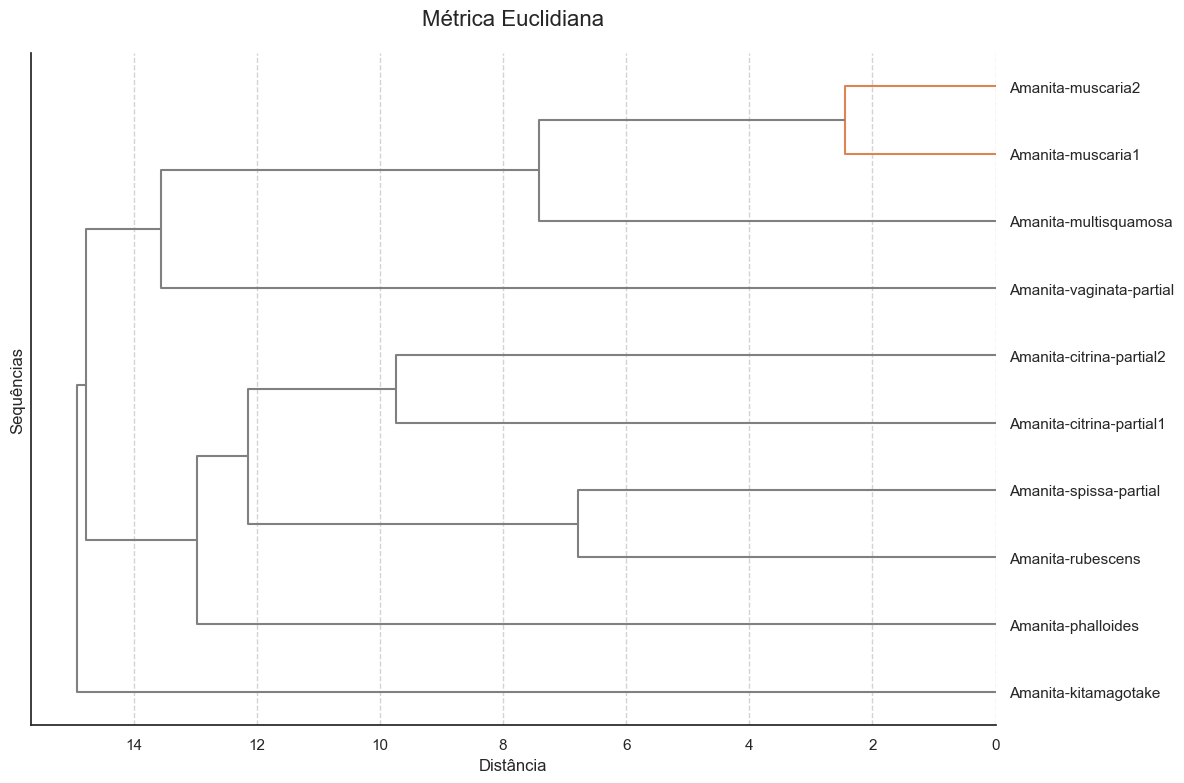

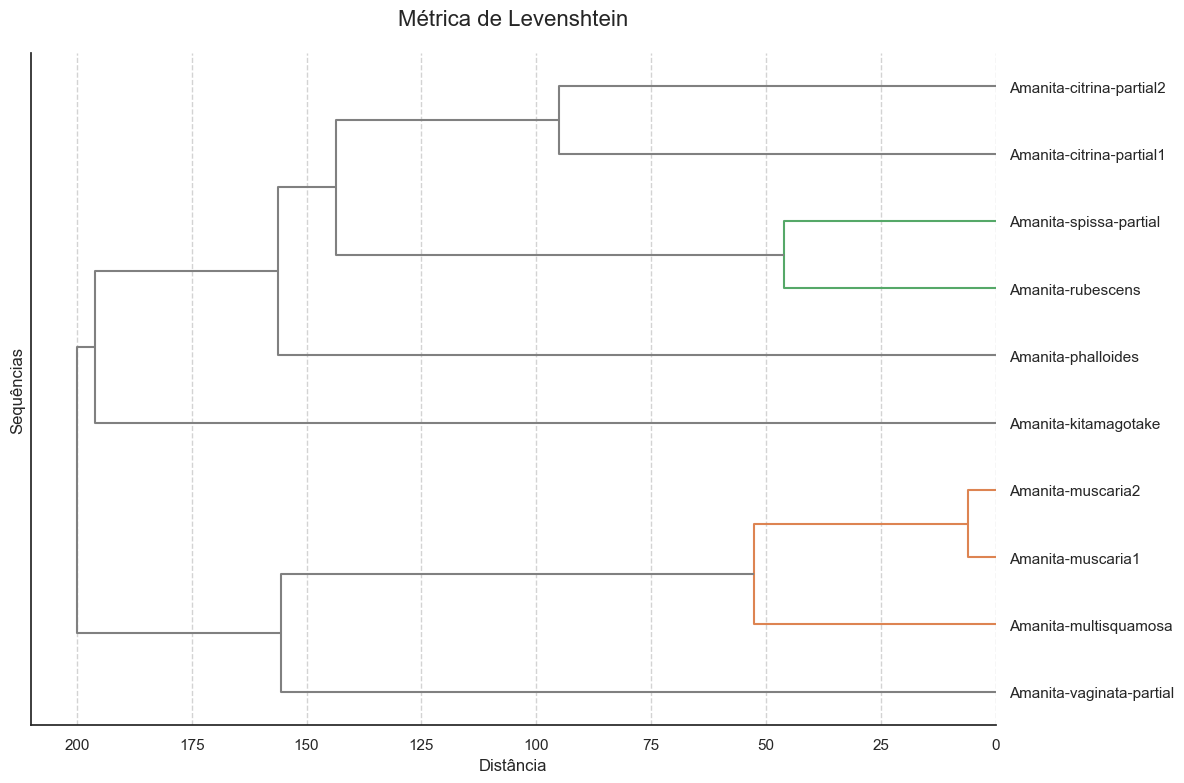

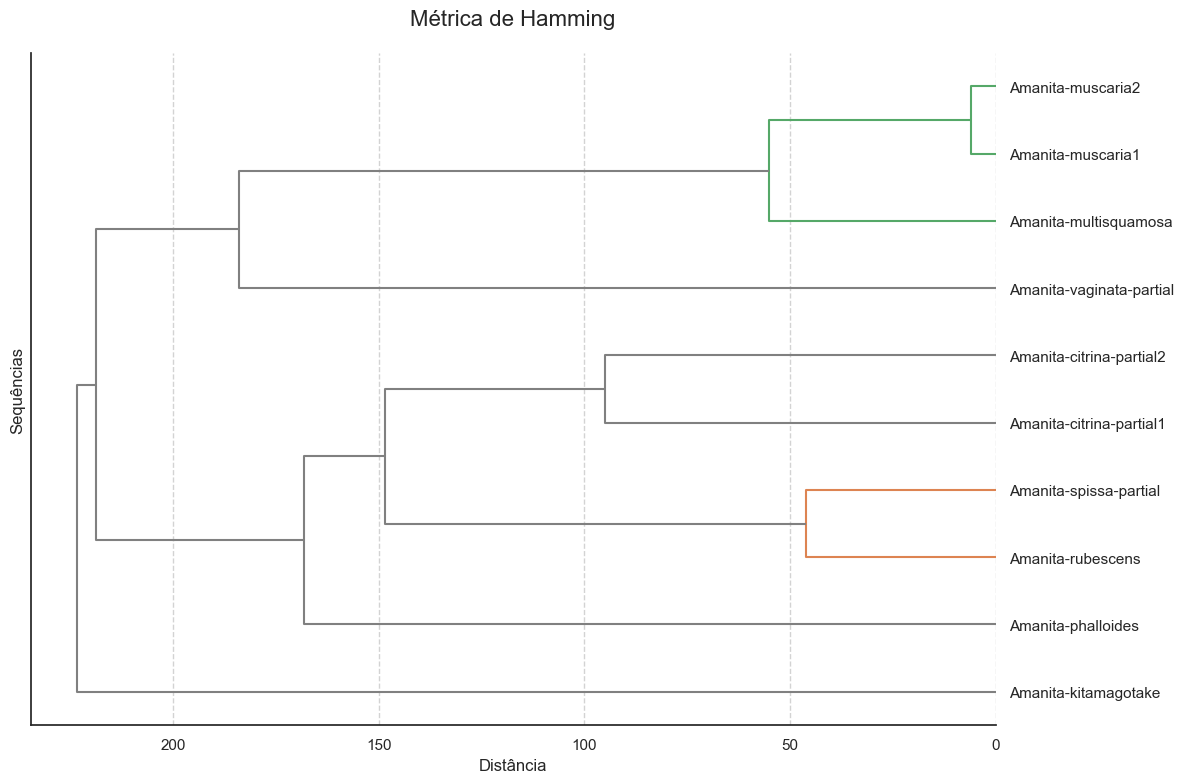

In [3]:
plotar_arvore(euclidiana_m, euclidiana_l, "Métrica Euclidiana")
plotar_arvore(levenshtein_m, levenshtein_l, "Métrica de Levenshtein")
plotar_arvore(hamming_m, hamming_l, "Métrica de Hamming")

Em nossa análise, perceba que, apesar da variação da distância, a organização dos organismos em cada um dos dendogramas é muito similar, com apenas uma diferença: na métrica de Levenshtein, o organismo Amanita kitamagotake deixa de ser o táxon-basal, distinguindo-a das demais árvores. Observemos, a seguir, uma árvore plotada com o [Phylo.io](https://mafft.cbrc.jp/alignment/server/spool/_nj.251125033218945.html) com o algoritmo de Neighbor-Joining, baseado em unidades taxonômicas operacionais que minimizam a distância total de um determinado galho da árvore:

![image.png](PhyloIO_Tree.svg)


Perceba que a árvore está bastante aproximada das árvores concordantes, de maneira que diríamos que, para esse problema, as métricas de Hamming e Euclidiana bastariam para a construção da árvore. A distância entre clados, porém, é radicalmente diferente, de maneira que não pode ser usada para verificar relações temporais da evolução, por exemplo. A proporcionalidade das distâncias em relação ao máximo, porém, parece se manter para essas duas.